## Import Dependincies

In [264]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics



In [265]:
insurance = pd.read_csv("insurance.csv")

df = insurance.copy()

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Data Analyzing

In [266]:
df.shape

(1338, 7)

In [267]:
df["sex"].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [268]:
df["region"].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [269]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [270]:
len(df[df.age < 25]), len(df[df.age > 53])

(278, 270)

In [271]:
df["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [272]:
df.isna().any().any() # No missing values

False

In [273]:
labels = pd.DataFrame(df["charges"])
df_dummies = pd.get_dummies(df)

df_new = pd.concat([df_dummies, labels], axis=1)

In [274]:
df_new

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,charges
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1,16884.92400
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0,1725.55230
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0,4449.46200
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0,21984.47061
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0,3866.85520
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0,10600.54830
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0,2205.98080
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0,1629.83350
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1,2007.94500


In [275]:
correlation = df_new.corr()

### Data Visualization

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'bmi'}>,
        <AxesSubplot:title={'center':'children'}>,
        <AxesSubplot:title={'center':'charges'}>],
       [<AxesSubplot:title={'center':'sex_female'}>,
        <AxesSubplot:title={'center':'sex_male'}>,
        <AxesSubplot:title={'center':'smoker_no'}>,
        <AxesSubplot:title={'center':'smoker_yes'}>],
       [<AxesSubplot:title={'center':'region_northeast'}>,
        <AxesSubplot:title={'center':'region_northwest'}>,
        <AxesSubplot:title={'center':'region_southeast'}>,
        <AxesSubplot:title={'center':'region_southwest'}>],
       [<AxesSubplot:title={'center':'charges'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

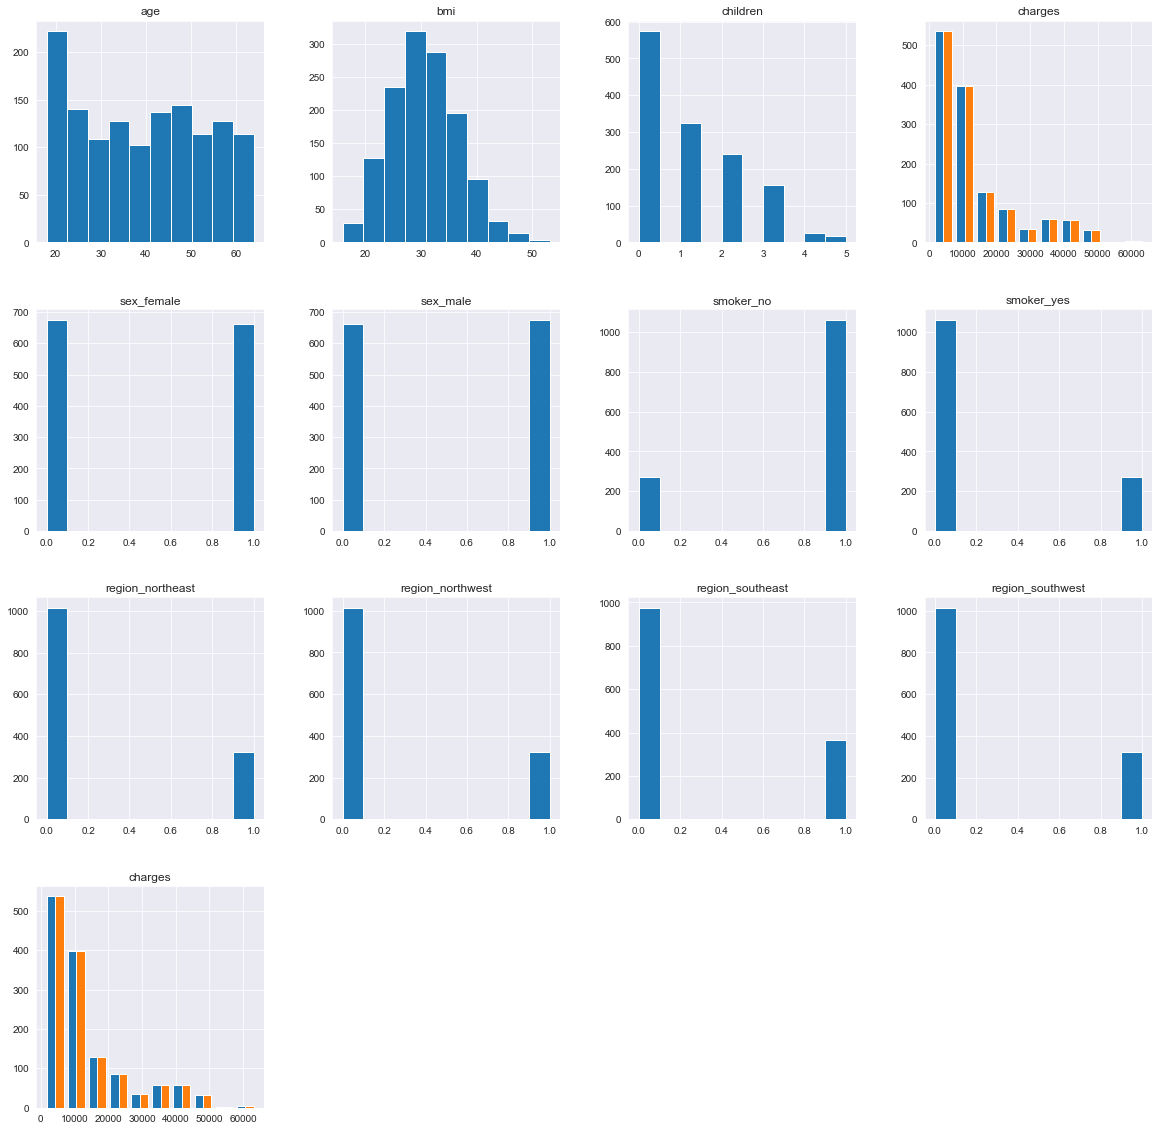

In [276]:
df_new.hist(figsize=(20, 20))

(array([[536., 398., 129.,  86.,  35.,  59.,  57.,  32.,   2.,   4.],
        [536., 398., 129.,  86.,  35.,  59.,  57.,  32.,   2.,   4.]]),
 array([ 1121.8739  ,  7386.729311, 13651.584722, 19916.440133,
        26181.295544, 32446.150955, 38711.006366, 44975.861777,
        51240.717188, 57505.572599, 63770.42801 ]),
 <a list of 2 BarContainer objects>)

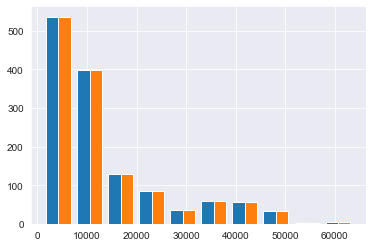

In [277]:
plt.hist(df_new.charges)

<AxesSubplot:>

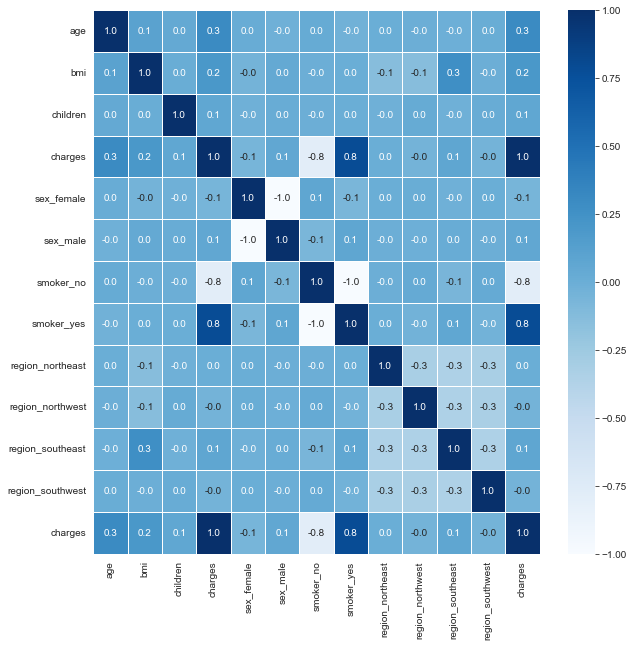

In [278]:
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, cmap="Blues", annot=True, fmt=".1f", linewidths=.5)

In [279]:
df_new.drop(["region_northeast", "region_northwest", "region_southeast", "region_southwest"], axis=1, inplace=True)
df_new

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,charges
0,19,27.900,0,16884.92400,1,0,0,1,16884.92400
1,18,33.770,1,1725.55230,0,1,1,0,1725.55230
2,28,33.000,3,4449.46200,0,1,1,0,4449.46200
3,33,22.705,0,21984.47061,0,1,1,0,21984.47061
4,32,28.880,0,3866.85520,0,1,1,0,3866.85520
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,10600.54830
1334,18,31.920,0,2205.98080,1,0,1,0,2205.98080
1335,18,36.850,0,1629.83350,1,0,1,0,1629.83350
1336,21,25.800,0,2007.94500,1,0,1,0,2007.94500


### Model Training

In [280]:
X, y = df_new.drop("charges", axis=1), df_new["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42) 

In [281]:
X_train.shape, y_train.shape

((1070, 7), (1070, 2))

In [282]:
lr = LinearRegression()
dtr = DecisionTreeRegressor()

In [283]:
lr.fit(X_train, y_train)
dtr.fit(X_train, y_train)

DecisionTreeRegressor()

In [284]:
lr_acc = lr.score(X_test, y_test)
print("Linear Regression Test Accuracy: ", lr_acc)

dtr_acc = dtr.score(X_test, y_test)
print("Decision Tree Regression Test Accuracy: ", dtr_acc)

Linear Regression Test Accuracy:  0.7811302113434097
Decision Tree Regression Test Accuracy:  0.6941473607867452


In [285]:
rnd = RandomForestRegressor()
rnd.fit(X_train, y_train)

RandomForestRegressor()

In [286]:
acc = rnd.score(X_test, y_test)
print("Accuracy is: ", acc)

Accuracy is:  0.8575058727741764


In [287]:
# R Square Value Train
train_prediction = rnd.predict(X_train)

lr_r2_train = metrics.r2_score(y_train, train_prediction)
print("R2 Score Train: ", lr_r2_train)


R2 Score Train:  0.9733816208227216


In [288]:
# R Square Value Test
test_prediction = metrics.r2_score(y_test, rnd.predict(X_test))
print("R2 Score Test: ", test_prediction)


R2 Score Test:  0.8575058727741764


### Making input predictions